### Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 


### Exploratory Data Analysis Steps....

* Univarate Analysis - Single Variable Analysis (Num: Histograms/Distplot| Cat: Countplot or Frequency Plot)

* Bivariate Analysis/Multivariate Analysis 
    * (Num vs Target(Num): Scatterplot & also Heatmap(Correlation Plot), 
    * Cat vs Num(Target): **Boxplot**/ViolinPlot/Barplot, 
    * Cat vs Cat (Target): Crosstab/Frequency - Countplot/Heatmap

* Missing Values & Imputation - We are going to deal with the missing values...
     * If it is a Numerical Var: Use Mean/Median Imputation
     *  Categorical Var - Frequency....
     
* Outlier Analysis & Treatment

* **Feature Engineering**

* Encoding and Scaling...Standard Scaler or Min Max Scaler for Scaling and for Categorical Encoding - One Hot Encoding, Label Encoding, Target Encoding and Frequency Encoding...


In [139]:
# Import the required libraries...

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
train = pd.read_csv("~/Downloads/Bigmart_train.csv")
test = pd.read_csv("~/Downloads/Bigmart_test.csv")

In [141]:
# Preview the Dataset...
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Univariate Analysis

In [142]:
# Combined the Dataset
combined = pd.concat([train, test], ignore_index = True)

In [143]:
train.shape, test.shape, combined.shape

((8523, 12), (5681, 11), (14204, 12))

In [144]:
# # Find all the Numerical Variables...
combined.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

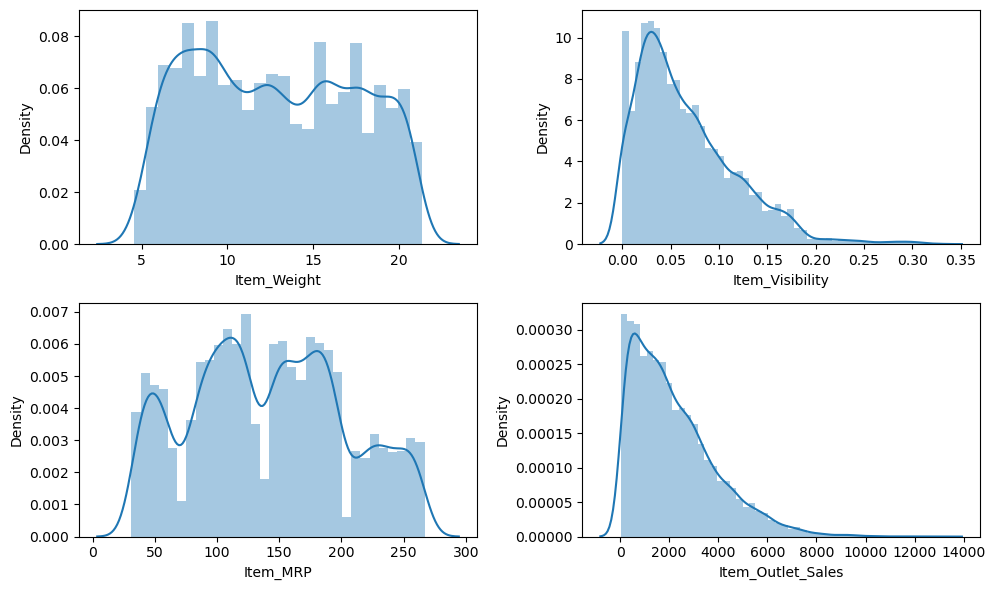

In [145]:
num_cols = ['Item_Weight', 'Item_Visibility', 
            'Item_MRP','Item_Outlet_Sales']

nrows = 2 # Number of rows in the plot
ncols = 2 # No of Columns for the plot
iterator = 1 # Plot Iterator...

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (10, 6))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined.loc[:, i])
    iterator = iterator+1

plt.tight_layout()
plt.show()

<Axes: >

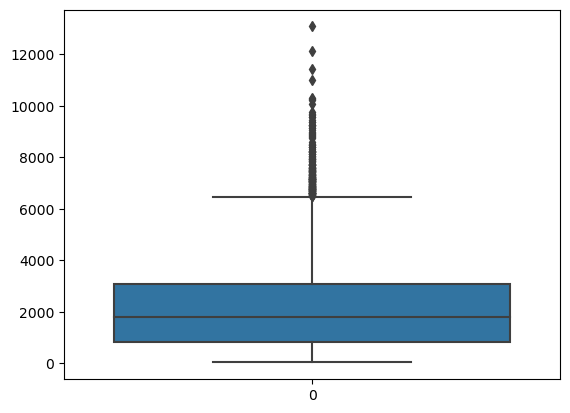

In [146]:
# Lets Analyse the Target

sns.boxplot(combined.Item_Outlet_Sales)

In [147]:
# Cat Vars...

combined.select_dtypes(include = "object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

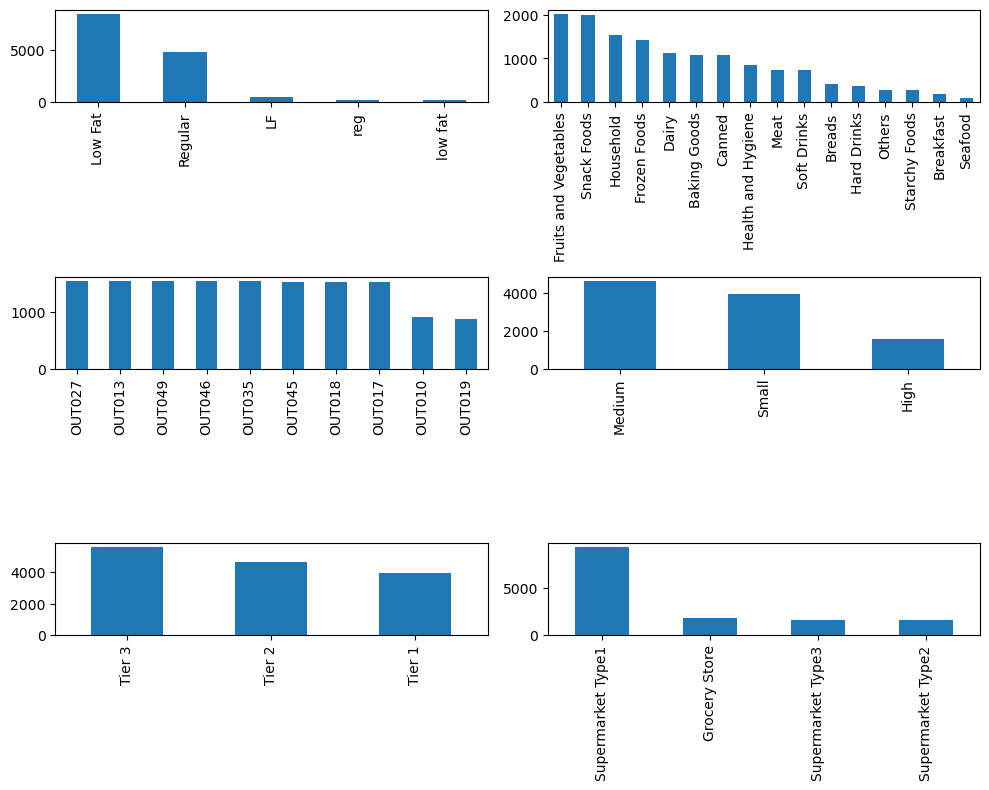

In [148]:
cat_cols = ['Item_Fat_Content', 
            'Item_Type', 'Outlet_Identifier',
            'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
nrows = 3
ncols = 2
repeater = 1

plt.figure(figsize = (10, 8))
for i in cat_cols:
    plt.subplot(nrows, ncols, repeater)
    combined.loc[:, i].value_counts().plot(kind = "bar")
    repeater+=1
    
plt.tight_layout()
plt.show()

### Univariate Analysis Inference

* Most of the Items that are sold are **Low Fat** Items
* The Top 5 Selling Items in the Business are **Fruits & Veggies**, **Snack Foods**, **Household**, **Frozen** and **Dairy**.

* Most Seen Outlet Type is **OUT027** and the Less Frequent Outlets in the Business are **OUT010 & OUT019**.

* Most of the Outlets built by the company are **Medium** Size Outlets
* Most of the Outlets are in **Tier3** Cities followed **Tier-2** and then **Tier-1**

* Most of the Outlet Themes are **Supermarket Type 1**

In [149]:
#combined.Outlet_Identifier.value_counts()

# combined.loc[combined.Outlet_Identifier=="OUT019", "Outlet_Type"].unique()

### Bivariate Analysis

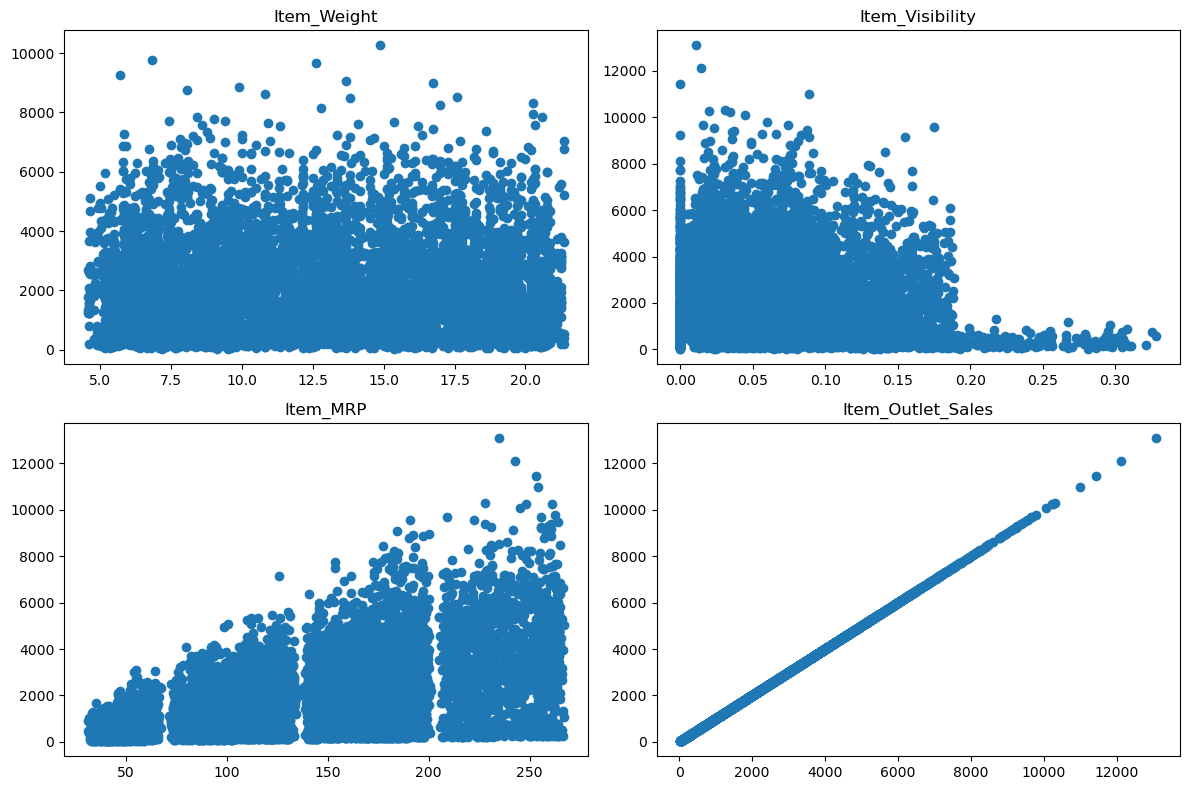

In [150]:
# Num vs Num

nrows = 2
ncols = 2
iterator = 1

plt.figure(figsize = (12, 8))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    plt.scatter(combined.loc[:, i], 
                    combined.Item_Outlet_Sales)
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

In [151]:
# Fix the Item Fat Content

combined.Item_Fat_Content.replace(to_replace = ["low fat", "LF","reg"],
                                 value = ["Low Fat", "Low Fat", "Regular"],
                                 inplace = True)

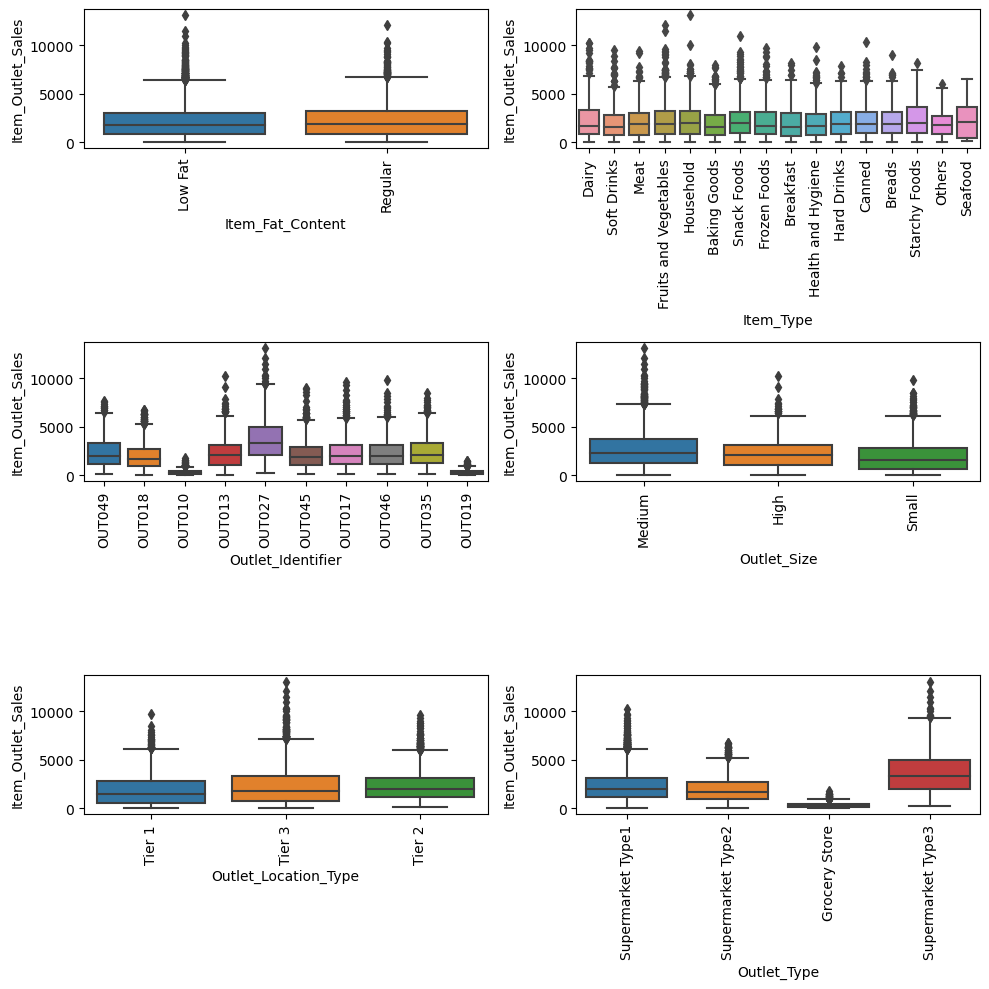

In [152]:
# Cat vs Num

nrows = 3
ncols = 2
rep = 1

plt.figure(figsize = (10, 10))
for i in cat_cols:
    plt.subplot(nrows, ncols, rep)
    sns.boxplot(data = combined, 
                x = i, y = "Item_Outlet_Sales")
    plt.xticks(rotation = 90)
    rep+=1
    
plt.tight_layout()
plt.show()

### Revision

1. What is the Average Sales
2. What is the 95% values of Sales.
3. Identify the Product that sells the Most
4. Find the Middle most observation for the MRP
5. Compare the Mean and Trimmed Mean of Sales
6. What percentage of Dairy Items are in the Data.
7. Which Product as the highest variation in Sales
8. What is the Range of Middle 50% of ITEM MRP
9. Are there any variables that should be excluded from the Model Building
10. Find Percentage of Variation in Item Weight for each Product
11. Is there any variable that is Normally Distributed
12. Identify the most visible Outlet Type for the Business
13. Do we have negatively skewed feature/Column in the Dataset
14. Find the Kurtosis of all the variables.
15. Identify the Presence of Extreme Values in the Dataset
16. Is there any effect of MRP on the Price?
17. Transform Item Outlet Sales such that the Mean is 0 and Standard Deviation is 1 
18. Transform the Sales in such a way that the range is 1
19. Check Skewness of Item Outlet Sales and find out how to reduce the skewness

In [153]:
# What is the Average Sales
print("Mean Sales: ", combined.Item_Outlet_Sales.mean())

# What is the 95% values of Sales.
print("95% Sales Values:", combined.Item_Outlet_Sales.quantile(0.95))

Mean Sales:  2181.288913575032
95% Sales Values: 5522.811


In [154]:
# Identify the Product that sells the Most

combined.Item_Type.mode()[0]

'Fruits and Vegetables'

In [155]:
# Find the Middle most observation for the MRP

combined.Item_MRP.median()

142.247

In [156]:
# Compare the Mean and Trimmed Mean of Sales
print("mean:", combined.Item_Outlet_Sales.mean())

import scipy.stats as stats # Statistical Library....
trimmed_mean = stats.trim_mean(train.Item_Outlet_Sales, 
                               proportiontocut=0.01)

print("Trimmed Mean",trimmed_mean)

# What percentage of Dairy Items are in the Data.
print(combined.loc[combined.Item_Type=="Dairy"]\
      .shape[0]/combined.shape[0])

mean: 2181.288913575032
Trimmed Mean 2138.3762353405964
0.07997747113489158


In [157]:
# Which Product as the highest variation in Sales
combined.groupby("Item_Type")["Item_Outlet_Sales"].std()

# What is the Range of Middle 50% of ITEM MRP
q3 = combined.Item_MRP.quantile(0.75)
q1 = combined.Item_MRP.quantile(0.25)
print("IQR RANGE: ", q3-q1)

# Are there any variables that should be excluded from the 
# Model Building


IQR RANGE:  91.84360000000001


In [158]:
# # Find Percentage of Variation in Item Weight for each Product

combined.groupby("Item_Type")["Item_Weight"]

In [159]:
for i in combined.Item_Type.unique():
    mean_=  combined.loc[combined.Item_Type==i, "Item_Weight"].mean()
    std_ = combined.loc[combined.Item_Type==i, "Item_Weight"].std()
    print("CV for", i,std_/mean_)

CV for Dairy 0.3522131559667399
CV for Soft Drinks 0.3739373755063592
CV for Meat 0.3642790439914629
CV for Fruits and Vegetables 0.3461973859651611
CV for Household 0.37318900890557627
CV for Baking Goods 0.386543702138451
CV for Snack Foods 0.35344333082714774
CV for Frozen Foods 0.3590288949024649
CV for Breakfast 0.3958751726877383
CV for Health and Hygiene 0.34551534644867565
CV for Hard Drinks 0.36538886491627415
CV for Canned 0.37480312491089957
CV for Breads 0.4153469410839404
CV for Starchy Foods 0.3097804421422045
CV for Others 0.2959160504964309
CV for Seafood 0.41326207322300035


### Scaling

* Standard Scaler
Standard Scaler is one of the popular techniques used for Scaling in the Data Science Fraternity. It involves calculating the mean & std of all the numerical columns and then using **Z score to convert the data into Standard Normal Distribution where the Mean of all the Columns is equal to 0 and Standard Deviation is 1.**

### Normalization

* It is another technique used to scale the data in such a way where the Min of each Column is Equal to 0 and the Max of each column is equal to 1.

* Since, it takes the range in denominator, thus, it is very much influenced by the presence of the Outliers in the data. Therefore Min Max Scaler is not a very effective technique in scaling the data.

Note: Standard Scaler is quite versatile in nature as it can handle the presence of Outliers well. 

Note2: However, in the presence of outliers in the data, one must apply **ROBUST SCALER** to scale the data.

In [160]:
train.loc[:, num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [161]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler() # Machine Instance 

In [162]:
# Scale the Data....
# sc = (xi-mean)/sd

# .fit() will only learn the mean & std
# .fit_transform() will not only learn the mean & std but also convert

scaled = sc.fit_transform(pd.DataFrame(combined.Item_MRP))

# Note: sc takes data in 2D format and hence, 
# I need to supply the DataFrame

In [163]:
print(pd.DataFrame(scaled, columns=["ZScore"]).mean())
print(pd.DataFrame(scaled, columns=["ZScore"]).std())

ZScore   -1.386919e-16
dtype: float64
ZScore    1.000035
dtype: float64


In [164]:
# Apply Standard Scaler on the Whole Data

sc = StandardScaler()

scaled = sc.fit_transform(combined.loc[:, num_cols])

In [165]:
pd.DataFrame(scaled, columns = num_cols).describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,1.176500e+04,1.420400e+04,1.420400e+04,8.523000e+03
mean,-1.449471e-17,-5.602703e-17,-1.386919e-16,1.635049e-16
std,1.000043e+00,1.000035e+00,1.000035e+00,1.000059e+00
min,-1.770704e+00,-1.281712e+00,-1.767181e+00,-1.258790e+00
25%,-8.775982e-01,-7.563065e-01,-7.569166e-01,-7.894057e-01
50%,-4.145348e-02,-2.318886e-01,2.000528e-02,-2.267687e-01
75%,8.505775e-01,5.457876e-01,7.224096e-01,5.391513e-01
max,1.839335e+00,5.100167e+00,2.027606e+00,6.391045e+00


In [166]:
# Min Max Scaler

mmax = MinMaxScaler()

In [167]:
pd.DataFrame(mmax.fit_transform(combined.loc[:, num_cols]), 
            columns = num_cols).min()

Item_Weight          0.0
Item_Visibility      0.0
Item_MRP             0.0
Item_Outlet_Sales    0.0
dtype: float64

In [168]:
def minmax(df, xi):
    return((df[xi]-min(df[xi]))/(max(df[xi])-min(df[xi])))

In [169]:
minmax(combined, "Item_MRP").describe()

count    14204.000000
mean         0.465686
std          0.263529
min          0.000000
25%          0.266224
50%          0.470958
75%          0.656055
max          1.000000
Name: Item_MRP, dtype: float64

#### Transformation

**Why Transform**

* The Purpose of Transformation is to reduce the **SKEWNESS** in the data.

* Most of the Statistical Models have an assumption about the data that it should be Normally Distributed/Gaussian Curve.

* We can apply some of the transformation techniques to reduce the skewness in the data

* Those Techniques are as follows:

    * Log Transformation
    * SQRT Transformation
    * Cube Root
    * Reciprocal
    * Box-Cox
    * Yeo-JohnSon

1.1775306028542796


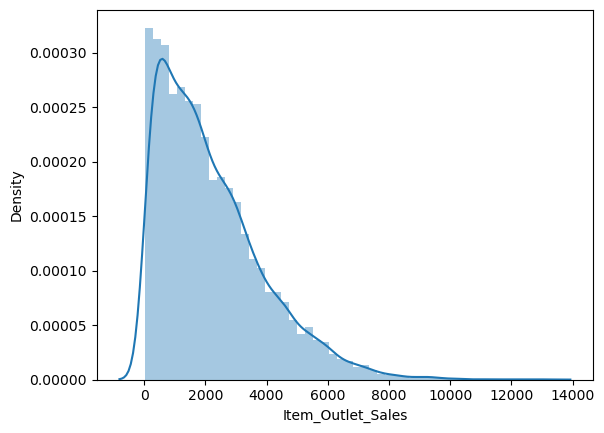

In [170]:
# Without Transformation
sns.distplot(train.Item_Outlet_Sales)
print(train.Item_Outlet_Sales.skew())

-0.887753343209305


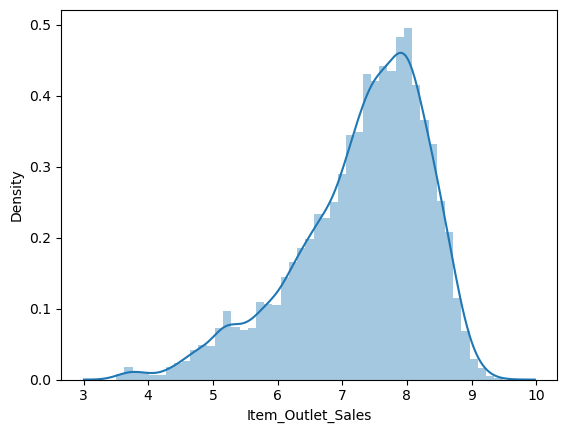

In [171]:
# Apply Log Transformation
sns.distplot(np.log(train.Item_Outlet_Sales))
print(np.log(train.Item_Outlet_Sales).skew())

1.0851408216698326


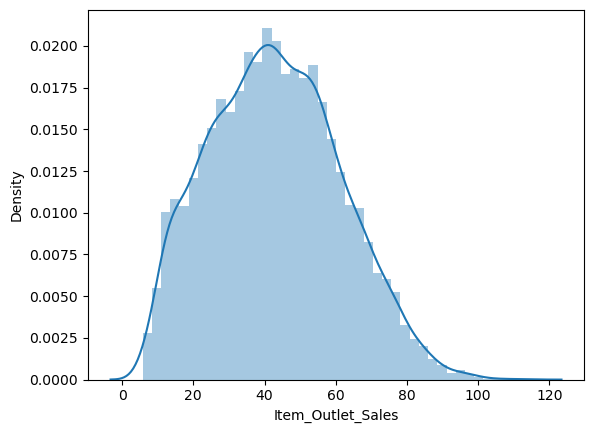

In [172]:
# Apply SQRT Transformation
sns.distplot(np.sqrt(train.Item_Outlet_Sales))
print(np.sqrt(train.Item_Outlet_Sales.skew()))

-0.10250699736722735


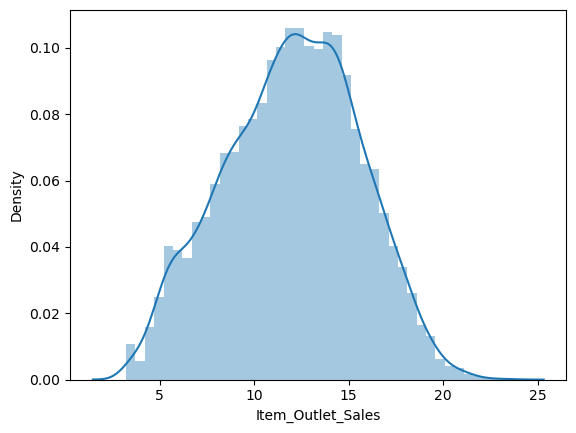

In [173]:
# Apply CUBEROOT Transformation
sns.distplot(np.cbrt(train.Item_Outlet_Sales))
print(np.cbrt(train.Item_Outlet_Sales).skew())

5.679237323396784


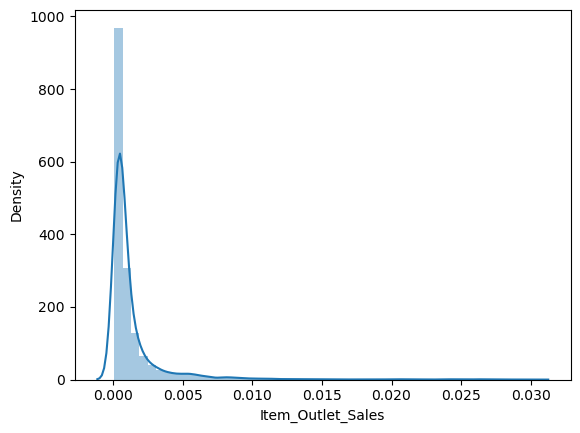

In [174]:
# Apply Recirpocal Transformation
sns.distplot(np.reciprocal(train.Item_Outlet_Sales))
print(np.reciprocal(train.Item_Outlet_Sales).skew())

### Box Cox Transformation & Yeo-Johnson Transformation

* BoxCox Transformation works on transforming the Positive Values(greater than 0) only as the function entails usage of Log Transformation as per the formula if the function encounters 0 in the data.

* Where as the YeoJohnson Function can work on any number be it 0, -ve or +ve number. In totality, the Yeo Johnson is more flexible and a versatile transformation bet on the data..

-0.0749649223767276


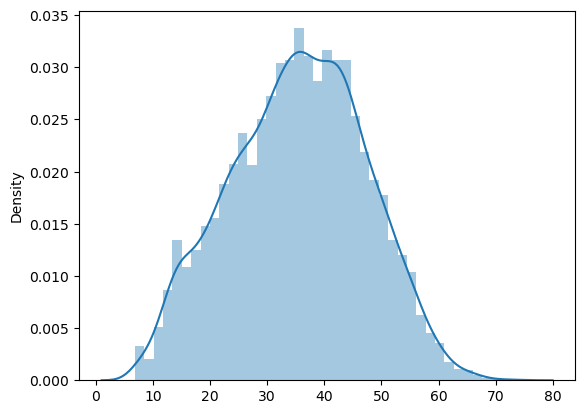

In [175]:
# use scipy.stats 

sns.distplot(stats.boxcox(train.Item_Outlet_Sales)[0])
print(stats.skew(stats.boxcox(train.Item_Outlet_Sales)[0]))

-0.07477744470274916


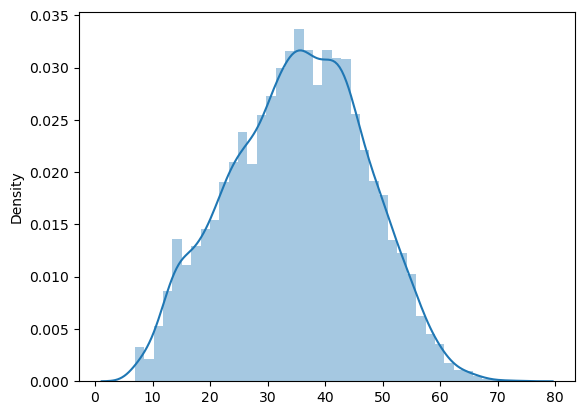

In [176]:
# use Yeo Johnson

sns.distplot(stats.yeojohnson(train.Item_Outlet_Sales)[0])
print(stats.skew(stats.yeojohnson(train.Item_Outlet_Sales)[0]))

In [177]:
stats.yeojohnson([23, 54, 98, 0, -134])

(array([ 31.07413761,  80.56195565, 157.18079953,   0.        ,
        -81.46815947]),
 1.1280463185584948)

### Missing Values

* Rule says if 95% or more data is missing in the column, then it is best to drop that column.   

Note: This is a theoretical rule. The point is to find the pattern in the data in such a way that you can handle most of the missing values in the data....

* Now, basis discussion, we see that prima facie, we can consider the mode of the categorical variable & Median in Numerical Variable to impute the missing value. 

* However, this approach might not work because we have not explore the pattern from the rest of the columns/features.

* Therefore, we need to do the pattern exploration on priority to find out the closest possible pattern for the missing value and then impute it accordingly,

* In the event of the pattern not being available or unable to mine the pattern, its always good to build the model and deal with the missing values accordingly.

In [178]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [179]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [180]:
# Outlet size is missing
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Identifier"].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [181]:
# Find the Mode of Outlet Type
combined.Outlet_Size.mode()[0]

'Medium'

In [182]:
combined.loc[combined.Outlet_Identifier=="OUT019", ].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [183]:
# Imputting the 'Small' in OUT010
combined.loc[(combined.Outlet_Identifier=="OUT010")&\
             (combined.Outlet_Size.isnull()), "Outlet_Size"] = "Small"

In [184]:
# Missing Outlets are 45 & 17
# 45 ~ S1
# 17 ~ S1
combined.loc[combined.Outlet_Identifier=="OUT045", 
             "Outlet_Type"].unique()

array(['Supermarket Type1'], dtype=object)

In [185]:
# Lets find out the Outlet Size where the Type is S1
combined.loc[combined.Outlet_Type=="Supermarket Type1", 
             "Outlet_Size"].mode()[0]

'Small'

In [186]:
combined.groupby(["Outlet_Identifier", "Outlet_Type"])\
["Outlet_Size"].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT010             Grocery Store      Small           925
OUT013             Supermarket Type1  High           1553
OUT018             Supermarket Type2  Medium         1546
OUT019             Grocery Store      Small           880
OUT027             Supermarket Type3  Medium         1559
OUT035             Supermarket Type1  Small          1550
OUT046             Supermarket Type1  Small          1550
OUT049             Supermarket Type1  Medium         1550
Name: Outlet_Size, dtype: int64

In [187]:
# Imputting Small in Remaining Data

combined.loc[combined.Outlet_Size.isnull(), 
             "Outlet_Size"] = "Small"

<Axes: >

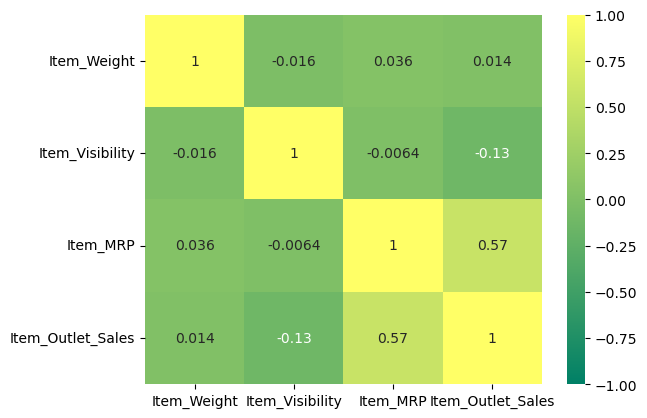

In [188]:
sns.heatmap(combined.loc[:, num_cols].corr(), annot = True,
            cmap = "summer",vmax=1,vmin=-1)

In [189]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [190]:
combined.loc[combined.Item_Identifier=="DRC01", "Item_Weight"]

1        5.92
2272     5.92
2927      NaN
5029     5.92
5077     5.92
5218     5.92
9453     5.92
10588    5.92
12787    5.92
Name: Item_Weight, dtype: float64

In [191]:
# Item Weight and Sales...

combined.Item_Weight.isnull().sum()

2439

In [192]:
combined.loc[combined.Item_Weight.isnull()].head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.12747,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [193]:
combined.loc[7, "Item_Weight"] =combined.loc\
[combined.Item_Identifier=="FDP10", "Item_Weight"].median()

In [194]:
# Lambda - very straight forward approach

combined["Item_Weight"] = combined.groupby("Item_Identifier")\
["Item_Weight"].apply(lambda x:x.fillna(x.median()))

In [195]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Outlet_Sales    5681
dtype: int64

In [196]:
combined["Item_Visibility"] = combined.groupby("Item_Identifier")\
["Item_Visibility"].apply(lambda x:x.replace(to_replace = 0, 
                                             value = x.median()))

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

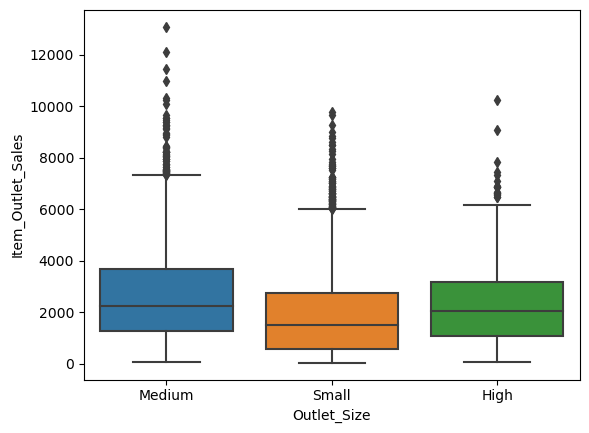

In [197]:
sns.boxplot(data = combined, x = "Outlet_Size", 
           y = "Item_Outlet_Sales")

### Feature Engineering

* Bin the Item Identifier and Item Type

Note: The Purpose of creating new features and binning is to make sure that the machine is able to capture the pattern well. This concept is known as Generalization.

In [198]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [199]:
# Extract the First Two Letters from Item ID
ids = []

for i in combined.Item_Identifier:
    ids.append(i[:2])

In [200]:
combined["Item_IDS"] = pd.Series(ids)

#### Steps that I Follow

* Univariate
* Biv
* Feature Engineering - Most Important Step..
* Missing Values
* Outlier Analysis and Removal - This is the step where I split the data in train and test back again.
* Scaling and Transformation
* Categorical Encoding

**Why I split the Data in Train and Test Before Outliers??**
* You remove the Outliers from training data only and not from test.
* Train - that dataset on which the model will get trained
* Test - is that dataset on which the model will **predict**.


<Axes: xlabel='Item_IDS', ylabel='Item_Outlet_Sales'>

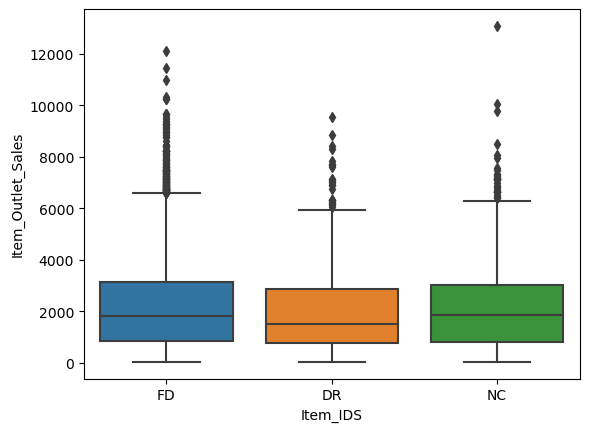

In [201]:
# Pattern of Item ID vs Sales
sns.boxplot(data = combined, x='Item_IDS', y = 'Item_Outlet_Sales')

In [202]:
# Where it is NC, we put Non Edible in Item Fat Content

combined.loc[combined.Item_IDS=="NC", "Item_Fat_Content"]="Non_Edible"


<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

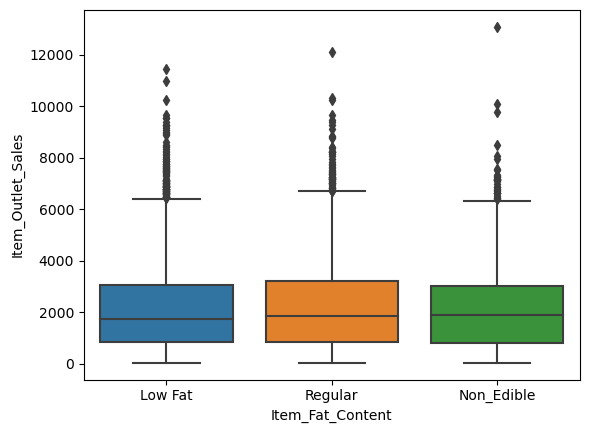

In [203]:
sns.boxplot(data = combined, x='Item_Fat_Content', 
            y = 'Item_Outlet_Sales')

In [204]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Non_Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [205]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [206]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast', 'Breads', 'Starchy Foods', 'Seafood']

non_perishables = ['Soft Drinks', 'Baking Goods', 
                   'Snack Foods', 'Frozen Foods','Hard Drinks', 'Canned']

In [207]:
def perish(x):
    if x in perishables:
        return("Perishables")
    elif x in non_perishables:
        return("Non_Perishables")
    else:
        return("Non_Eateries")

In [208]:
combined["Item_Type"] = combined.Item_Type.apply(perish)

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

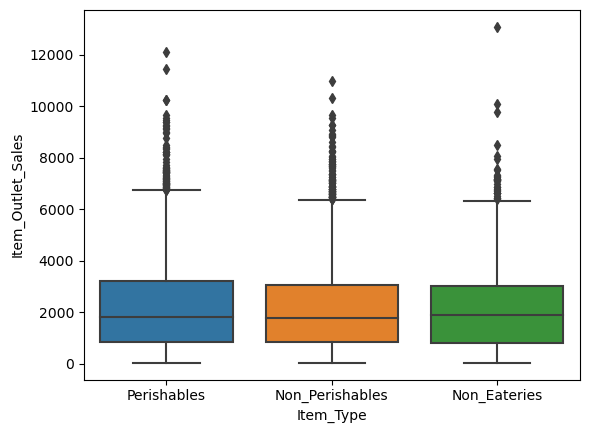

In [209]:
sns.boxplot(data = combined, x='Item_Type', 
            y = 'Item_Outlet_Sales')

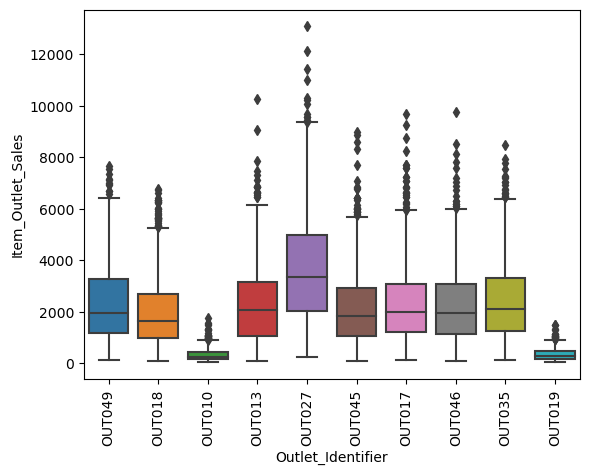

In [210]:
# Outlet Identifier
sns.boxplot(data = combined, x='Outlet_Identifier', 
            y = 'Item_Outlet_Sales')
plt.xticks(rotation = 90)
plt.show()

# Top Performers, Avg Performers, Bad Performers


In [211]:
#combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

In [212]:
# Top - 27, 13 and 46, Low - 10 and 19
top = ['OUT013', "OUT027", "OUT046"]
low = ['OUT010', "OUT019"]

In [213]:
def outliers(x):
    if x in top:
        return("Top_Perf")
    elif x in low:
        return("Low_Perf")
    else:
        return("Avg_Perf")

In [214]:
combined["Outlets"] = combined.Outlet_Identifier.apply(outliers)

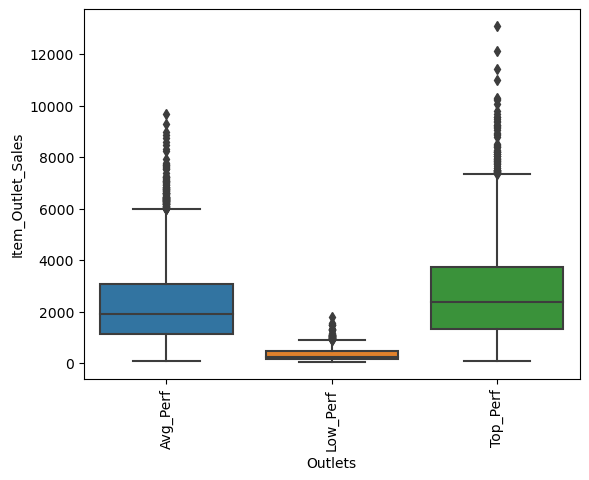

In [215]:
sns.boxplot(data = combined, x='Outlets', 
            y = 'Item_Outlet_Sales')
plt.xticks(rotation = 90)
plt.show()

In [216]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf
3,FDX07,19.20,Regular,0.022914,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf
4,NCD19,8.93,Non_Edible,0.013177,Non_Eateries,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf


In [217]:
# Vintage of the Outlet...
combined["Vintage"] = 2013 - combined.Outlet_Establishment_Year

In [218]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf,14
3,FDX07,19.20,Regular,0.022914,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf,15
4,NCD19,8.93,Non_Edible,0.013177,Non_Eateries,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf,26


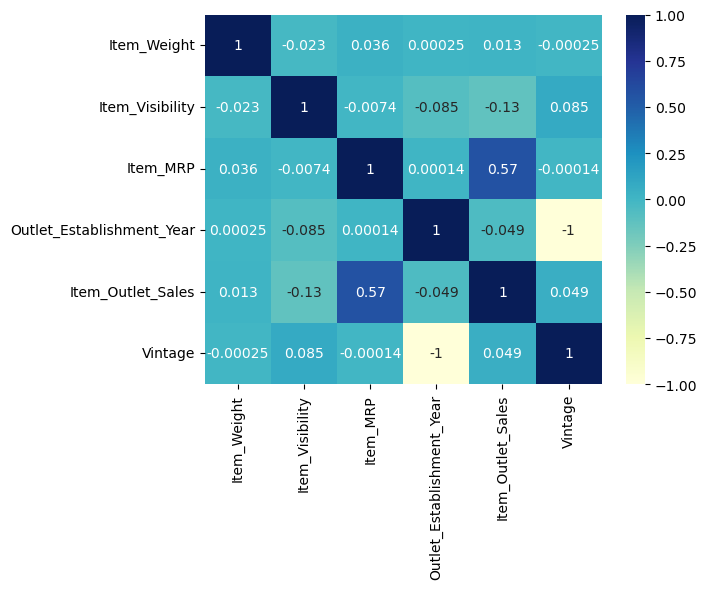

In [219]:
# Correlation plot
sns.heatmap(combined.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [220]:
# Quantity
combined["Price_Per_Unit"] = combined.Item_MRP/combined.Item_Weight

<Axes: xlabel='Price_Per_Unit', ylabel='Item_Outlet_Sales'>

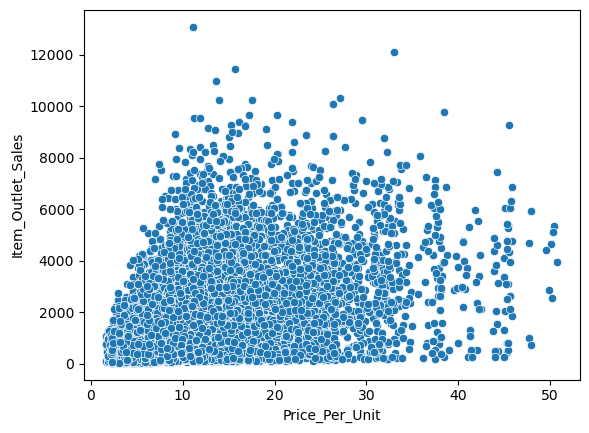

In [221]:
sns.scatterplot(data = combined, x = "Price_Per_Unit", 
                y = "Item_Outlet_Sales")

In [222]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14,26.861204
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4,8.153581
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf,14,8.092457
3,FDX07,19.20,Regular,0.022914,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf,15,9.484115
4,NCD19,8.93,Non_Edible,0.013177,Non_Eateries,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf,26,6.031512


In [223]:
# Drop the Unnecessary Columns
combined.drop(["Item_Identifier", "Outlet_Identifier",
              "Outlet_Establishment_Year"], axis = 1, inplace = True)

In [224]:
pd.set_option('display.max_columns', 50)
pd.get_dummies(combined, drop_first = True).shape

(14204, 21)

### Outliers Analysis

Here at this stage, we will split the data in Train and Test.

``The No of Columns/Features in the Test Set is always n-1 where n is the total no of columns in the Train Set.``

* Train set is the data from where the model will learn the pattern because it has predictors and the target variable.

* Test is the data where we will do the prediction and check the performance of the model...


#### Rule of Identifying the Outliers

* Any value **greater than (Q3 + 1.5 * IQR)** is known as Outlier. This is called **Upper Outlier**

* Similary, Any value **less than (Q1 - 1.5 * IQR)** is known as **Lower Outlier**

In [225]:
# Splitting the Data back in train and test....

train.shape, test.shape, combined.shape

((8523, 12), (5681, 11), (14204, 13))

In [226]:
newtrain = combined.loc[0:train.shape[0]-1, ]
newtest = combined.loc[train.shape[0]:, ]

In [227]:
newtrain.shape, newtest.shape

((8523, 13), (5681, 13))

<Axes: xlabel='Item_Outlet_Sales'>

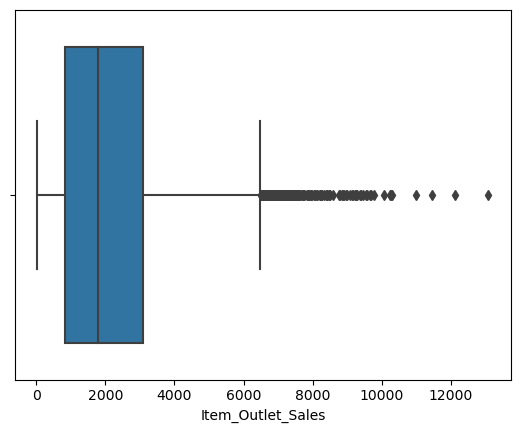

In [228]:
# See the Outlier
sns.boxplot(data = newtrain, x = "Item_Outlet_Sales")

In [229]:
# Lets Frame the Rules
q3 = newtrain.quantile(0.75)
q1 = newtrain.quantile(0.25)

# Inter Quartile Range
IQR = q3 - q1

# Upper Outlier Cut off
upper = q3 + 1.5*IQR

# Lower Outlier Cut off
lower = q1 - 1.5*IQR

In [230]:
# Lets Remove the Outliers from the Train Dataset only....

# .any(axis = 1) represents that the condition should be checked for all
# the rows and wherever the condition is met, it should produce the data...

wt_outliers = newtrain.loc[~((newtrain>upper) | \
                             (newtrain<lower)).any(axis = 1)]

<Axes: xlabel='Item_Outlet_Sales'>

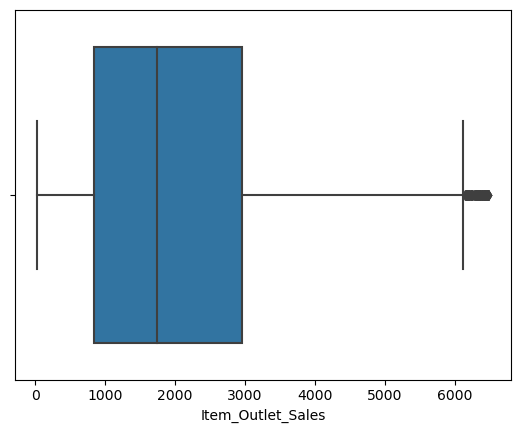

In [231]:
sns.boxplot(data = wt_outliers, x = "Item_Outlet_Sales")

### Scaling post Outliers

In [232]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [233]:
# Applying it in Train and Test Together

nums = ['Item_Weight', 'Item_Visibility', 
        'Item_MRP','Price_Per_Unit']

for i in nums:
    # Scaling the Train Features
    wt_outliers.loc[:, i] = sc.fit_transform(pd.DataFrame\
                                             (wt_outliers.loc[:, i]))    
    # Scale the Test Set Features.
    newtest.loc[:,i] = sc.transform(pd.DataFrame(newtest.loc[:, i]))

In [234]:
wt_outliers.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit
0,-0.846213,Low Fat,-1.147039,Perishables,1.904940,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14,2.378215
1,-1.590385,Regular,-1.075117,Non_Perishables,-1.458698,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4,-0.537666


### Outliers Using Z Score 

* Generally the Z Score is applied on the Target variable...

#### Empirical Rule

* 68.3% Data lies within +/- 1 S.D.
* 95.44% Data lies within +/- 2 S.D.
* 99.7% Data lies within +/- 3 S.D.

In [235]:
# Find the Z Score of the Target variable....

from scipy.stats import zscore

newtrain["z_scaled"] = zscore(newtrain.Item_Outlet_Sales)

In [236]:
newtrain.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit,z_scaled
0,9.3,Low Fat,0.016047,Perishables,249.8092,Medium,Tier 1,Supermarket Type1,3735.138,FD,Avg_Perf,14,26.861204,0.910601


In [237]:
# Condition is: Any value greater than  or less than +/-3 Sigma/Zscore is
# An Outlier...

newtrain.loc[np.abs(newtrain.z_scaled)>3].shape # Outlier Data

(90, 14)

In [238]:
# Data After Outliers Removal....
newtrain.loc[np.abs(newtrain.z_scaled)<=3].shape

(8433, 14)

In [239]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [240]:
# Finding the Mean Sales of Outlets
mean_sales = train.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].mean().to_dict()

In [241]:
# Target Encoding of Outlets
train["Outlet_Mean_Sales"] = train.Outlet_Identifier.map(mean_sales)

In [242]:
# Encoding Test Set basis Target variable...

test["Outlet_Mean_Sales"] = test.Outlet_Identifier.map(mean_sales)

In [243]:
mean_sales

{'OUT010': 339.351661981982,
 'OUT013': 2298.995255579399,
 'OUT017': 2340.67526349892,
 'OUT018': 1995.498739224138,
 'OUT019': 340.3297227272727,
 'OUT027': 3694.0385576470585,
 'OUT035': 2438.841866021505,
 'OUT045': 2192.384797631862,
 'OUT046': 2277.8442668817206,
 'OUT049': 2348.3546346236562}

In [244]:
# Item Type Encoding Basis Target

product_sales = train.groupby("Item_Type")\
["Item_Outlet_Sales"].mean().to_dict()

In [245]:
# We have to now use the above encoding to replace Item Type with Avg Sales
train["Prod_Sales"] = train.Item_Type.map(product_sales)

In [246]:
train.drop("Prod_Sales", axis = 1, inplace =True)

In [247]:
del(product_sales)

In [248]:
train["Outlet_Sales_Std"] = train.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("std")

train["Outlet_Sales_Median"] = train.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("median")

<Axes: >

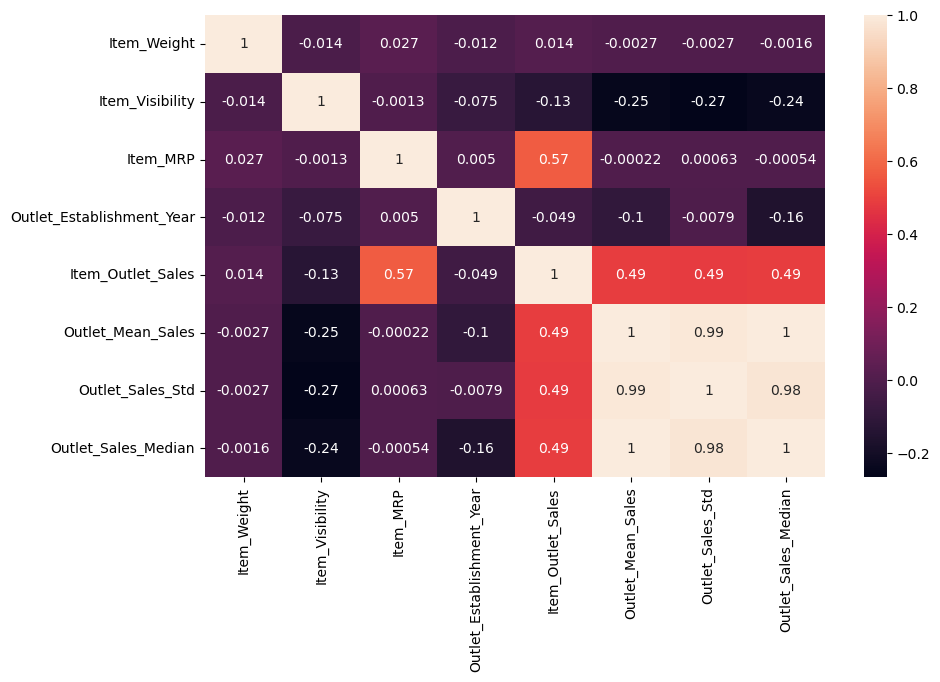

In [249]:
plt.figure(figsize = (10, 6))
sns.heatmap(train.corr(), annot = True)

In [250]:
wt_outliers.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit
0,-0.846213,Low Fat,-1.147039,Perishables,1.904940,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14,2.378215
1,-1.590385,Regular,-1.075117,Non_Perishables,-1.458698,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4,-0.537666
2,0.959175,Low Fat,-1.131172,Perishables,0.099263,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf,14,-0.547193
3,1.333462,Regular,-0.994171,Perishables,0.774812,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf,15,-0.330281
4,-0.927676,Non_Edible,-1.210936,Non_Eateries,-1.365366,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf,26,-0.868424


In [251]:
wt_outliers.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [252]:
# dictionary to map the Outlet Size....

dict_size = {"Medium":3, "Small":2, "High":1}
wt_outliers["Outlet_Size"] = wt_outliers["Outlet_Size"].map(dict_size)

In [253]:
newtest["Outlet_Size"] = newtest["Outlet_Size"].map(dict_size)

In [254]:
# Frequency Encoding on Outlet Type
#train.Item_Type.value_counts(normalize = True).to_dict()

In [255]:
# One Hot Encoding....

dummytrain = pd.get_dummies(wt_outliers, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

In [256]:
dummytrain.shape, dummytest.shape

((7881, 20), (5681, 20))

In [257]:
# remove tgt from dummytest
dummytest.drop("Item_Outlet_Sales", axis = 1, inplace = True)

In [258]:
dummytrain.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Vintage,Price_Per_Unit,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Non_Perishables,Item_Type_Perishables,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_IDS_FD,Item_IDS_NC,Outlets_Low_Perf,Outlets_Top_Perf
0,-0.846213,-1.147039,1.904940,3,3735.1380,14,2.378215,0,0,0,1,0,0,1,0,0,1,0,0,0
1,-1.590385,-1.075117,-1.458698,3,443.4228,4,-0.537666,0,1,1,0,0,1,0,1,0,0,0,0,0
2,0.959175,-1.131172,0.099263,3,2097.2700,14,-0.547193,0,0,0,1,0,0,1,0,0,1,0,0,0
3,1.333462,-0.994171,0.774812,2,732.3800,15,-0.330281,0,1,0,1,0,1,0,0,0,1,0,1,0
4,-0.927676,-1.210936,-1.365366,1,994.7052,26,-0.868424,1,0,0,0,0,1,1,0,0,0,1,0,1


### Modelling

* Simple Model

* CV Model

In [259]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Initiate the Model
lr = LinearRegression()

# Split the Data in X and y
X = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales

# Define the KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [260]:
# Deploy the KFold Model

pred = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index] # Creating X train
    ytrain = y.iloc[train_index] # Creating y train
    pred.append(lr.fit(xtrain, ytrain).predict(dummytest))

<Axes: >

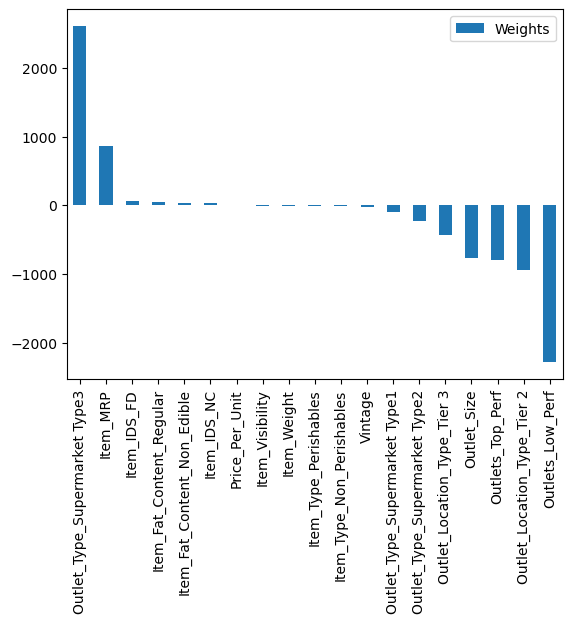

In [263]:
# plot the coefficients

pd.DataFrame(lr.coef_,lr.feature_names_in_,columns = ['Weights']).\
sort_values(by='Weights',ascending = False).plot(kind='bar')
# some features are getting high weightage and some features are getting low weightage

In [261]:
final = pd.DataFrame(pred).T.mean(axis = 1)

In [262]:
# Submission File
submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales": np.abs(final)})

In [126]:
# Export the submission file as csv file
submission.to_csv("LR_5CV.csv", index = False) # RMSE: 1211

Here, RMSE of 1211 dollars mean that the predicted sales vs actual sales can have a deviation of 1200 dollars. It means that if I build another forecasting model, the predicted sales can be +/- 1200 dollars.

In [127]:
dummytrain.Item_Outlet_Sales.mean()

2045.1116960284228

In [128]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 5)
kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
# Build the CV Model
pred = []

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain= y.iloc[train_index]
    pred.append(rf.fit(xtrain, ytrain).predict(dummytest))

In [129]:
final = pd.DataFrame(pred).T.mean(axis = 1)

In [130]:
# Submission
submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales": np.abs(final)})

In [131]:
# Export the submission file as csv file
submission.to_csv("RansomForest.csv", index = False) # RMSE: 1183

#### Recursive Feature Elimination Technique

* estimator = model()
* step = no of features to be removed after each iteration
* cv = cross validation step
* scoring = scoring criteria....


### What is the difference between the SFS and RFE

* SFS has the property of giving best features without providing any number of Features. 

* The selection or elimination criteria is dependent on the Scoring Metric. 

* Whereas in RFE, the feature is totally dependent on the Feature Ranking which can be similar to calculating Feature Importance using Random Forest Model. 

* In RFE, the model will give weightage to those features that have significant impact in predicting Y variable. Thus, only those features that carry high weightage are included as the final set of predictors where in the rest of the features are discarded or not considered.


* Another difference is **n_features_to_select_=None** which is that there is no option in RFE to optimise the best set of features. Either, it can be 50% features or I as an analyst have to provide the optimal number of features.

In [132]:
from sklearn.feature_selection import RFE

rf = RandomForestRegressor(max_depth = 5)
rfecv = RFE(estimator = rf, n_features_to_select=None)

<Axes: >

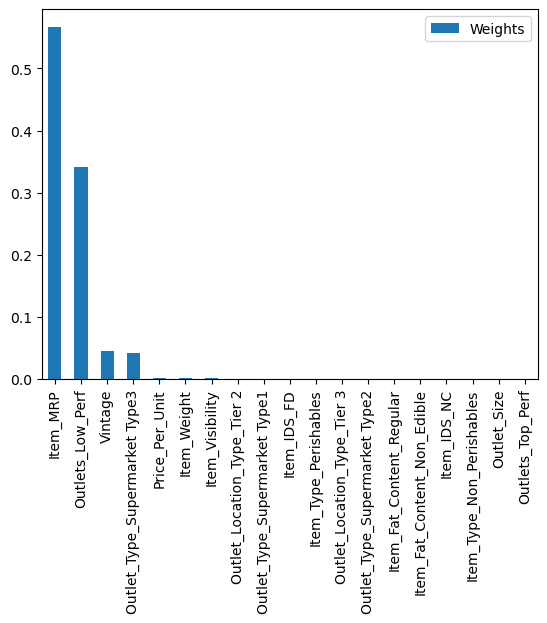

In [133]:
# Checking Feature Importance using Random Forest

pd.DataFrame(rf.fit(X, y).feature_importances_, 
             index=X.columns, columns = ["Weights"]).\
sort_values(by = "Weights", ascending = False).plot(kind = "bar")

In [135]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor

sgd.fit(X,y).predict(test)

TypeError: BaseSGDRegressor.fit() missing 1 required positional argument: 'y'

### regularization
* regularization involves penalizing the weak predictors and giving correct weightage to the strong predictors.

** what is the problem we are solving using regularization**

* since the model is overfitted and gives undue weightage to the weak predictors.Thus,we introduce the regularization Tehniques
to control overfitting.

** how it works**

* it will introduce a bias in the Model and the equation for the said model under RIdge regression would be SSE + alpha*
(coefficient_weights)^2
* what really happens is we introduce Bias to control the Variance.

In [ ]:
linear regression and teguarlization model

In [292]:
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error

# RMSE
def rmse(y,yhat):
    return(np.sqrt(mean_squared_error(y,yhat)))

# initate the models
lr = LinearRegression()
ridge = Ridge(alpha=0.05)
Lasso = Lasso(alpha= 0.05)
enet = ElasticNet()
#kfold
Kfold = KFold(n_splits = 5, shuffle = True,random_state = 42)

In [281]:
# fit the models.
for train_index, test_index in kfold.split(X,y):
    # train_Index represents the training set
    # test_index represents the validation set..
    # we will create xtrain,xtest,ytrain,ytest
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = X.iloc[test_index] # validation set
    ytest = y.iloc[test_index]
    #model
    yhat = lr.fit(xtrain,ytrain).predict(xtest)
    print("RMSE: ",rmse(ytest,yhat))
     # predict
    finalprediction = lr.fit(xtrain,ytrain).predict(dummytest)

RMSE:  988.3927854284394
RMSE:  980.5717867702373
RMSE:  986.2844596737289
RMSE:  991.6410453200302
RMSE:  988.0918571334257


In [282]:
# visualize the coeffiients

coef = pd.DataFrame(lr.coef_,index = lr.feature_names_in_,columns=['Weights'])

<Axes: >

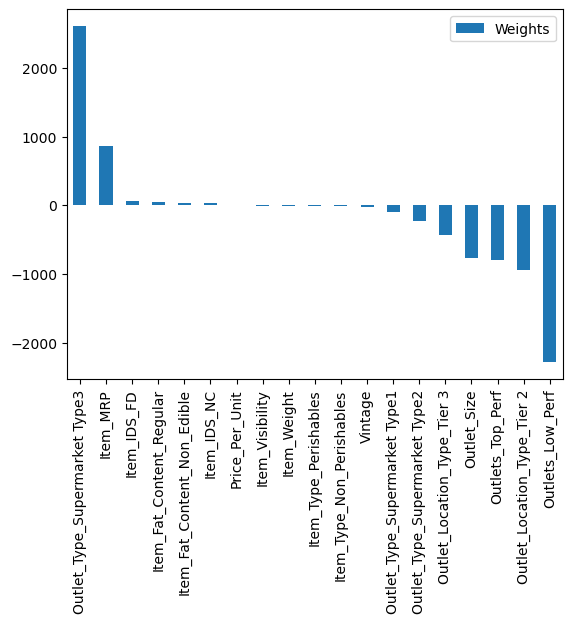

In [283]:
coef.sort_values(by = 'Weights',ascending = False).plot(kind='bar')

In [288]:
# basis the above output, the 5 fold validation is giving me different RMSEs. this represents that the model is giving different
#weightage to different predictors in different

In [289]:
# this represents that the model is giving different weightage to diff

In [287]:
# fit the models.
ridge = (=50)
for train_index, test_index in kfold.split(X,y):
    # train_Index represents the training set
    # test_index represents the validation set..
    # we will create xtrain,xtest,ytrain,ytest
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = X.iloc[test_index] # validation set
    ytest = y.iloc[test_index]
    #model
    yhat = ridge.fit(xtrain,ytrain).predict(xtest)
    print("RMSE: ",rmse(ytest,yhat))
     # predict
    finalprediction = lr.fit(xtrain,ytrain).predict(dummytest)

RMSE:  988.4144930396822
RMSE:  980.5578772226773
RMSE:  986.2868297938287
RMSE:  991.6758516717651
RMSE:  988.0401711959569


In [ ]:
coef = pd.DataFrame(lr.coef_,index = lr.feature_names_in_,columns=['Weights'])

In [296]:
# fit the models.
lasso = Lasso(alpha=5)
for train_index, test_index in kfold.split(X,y):
    # train_Index represents the training set
    # test_index represents the validation set..
    # we will create xtrain,xtest,ytrain,ytest
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = X.iloc[test_index] # validation set
    ytest = y.iloc[test_index]
    #model
    yhat = lasso.fit(xtrain,ytrain).predict(xtest)
    print("RMSE: ",rmse(ytest,yhat))
     # predict
    finalprediction = lr.fit(xtrain,ytrain).predict(dummytest)

TypeError: 'Lasso' object is not callable

In [295]:
# elastic net

enet = ElasticNet()
for train_index, test_index in kfold.split(X,y):
    # train_Index represents the training set
    # test_index represents the validation set..
    # we will create xtrain,xtest,ytrain,ytest
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = X.iloc[test_index] # validation set
    ytest = y.iloc[test_index]
    #model
    yhat = enet.fit(xtrain,ytrain).predict(xtest)
    print("RMSE: ",rmse(ytest,yhat))
     # predict
    finalprediction = lr.fit(xtrain,ytrain).predict(dummytest)

RMSE:  1136.3983587247876
RMSE:  1140.2436955980463
RMSE:  1129.6019964629525
RMSE:  1143.4200822596895
RMSE:  1134.690135179186


In [297]:
from sklearn.model_selection import GridSearchCV

params = {'l1_ratio':[0.1,0.12,0.2,0.5,0.65,0.7,0.75,0.95]}

grid = GridSearchCV(estimator = enet,param_grid = params,scoring = rmse,cv=5)


In [298]:
grid.fit(X,y) # fitted the model

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'l1_ratio': [0.1, 0.12, 0.2, 0.5, 0.65, 0.7, 0.75,
                                      0.95]},
             scoring=<function rmse at 0x0000024A642ABBE0>)

In [299]:
grid.best_params_

{'l1_ratio': 0.1}